## Airline Passenger Forecasting using RNN, LSTM & GRU

In this lab, we will estimate the number of passengers in the coming years by analysing the number of passengers in the past years.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings('ignore')

This dataset contains how many passengers traveled monthly from 1949 to 1960. 


**Month: the date in the month is a variable.** 


**Passengers: estimates the number of passengers per month.**

In [3]:
# # Import and show dataset
data = pd.read_csv("international-airline-passengers.csv")
print("Shape of Data: ", data.shape)
data.head()

Shape of Data:  (145, 2)


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


<AxesSubplot:>

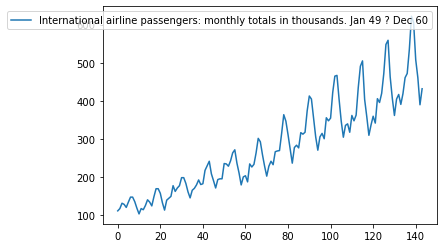

In [4]:
# Plot data
data.plot()

In [5]:
data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
# Drop the row with NaN
data=data.dropna(how='any',axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           144 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [7]:
# Create a dataframe with only the number of passengers
df=data.drop('Month', axis=1)
# Convert the dataframe to a numpy array
df=df.values
print(df[:5])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]


In [8]:
# Scale the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [9]:
# Split data into predictors and outcomes
# predict the number of passengers using by the past 6 months' number of passengers
X=[]
y=[]
sequence=6
for i in range(len(df_scaled) - sequence):
    X.append(df_scaled[i:(i + sequence),0]) 
    y.append(df_scaled[i + sequence,0])
X,y=np.array(X),np.array(y)

In [10]:
print("Predictors")
print(X[:5])
print("Outcomes")
print(y[:5])

Predictors
[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208 0.08494208]
 [0.04826255 0.03281853 0.05984556 0.08494208 0.08494208 0.06177606]
 [0.03281853 0.05984556 0.08494208 0.08494208 0.06177606 0.02895753]]
Outcomes
[0.08494208 0.08494208 0.06177606 0.02895753 0.        ]


In [11]:
# Reshape the predictor 
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(138, 6, 1)

In [12]:
# Split data into training and test sets 

# Set the size of training and test data
# Use 75% of the data for training
train_size = math.ceil(len(X) * 0.75)
test_size = len(X - train_size)

# Split X and y into training and test sets
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]

In [13]:
# Show the size of training and test sets
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train:  (104, 6, 1)
y_train:  (104,)
X_test :  (34, 6, 1)
y_test :  (34,)


In [14]:
# Simple RNN model
rnn=Sequential()
rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32))
rnn.add(Dense(units=1))


In [15]:
#TODO
# SimpleRNN summary
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 32)             1088      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable params: 0
_________________________________________________________________


In [31]:
#TODO
#Compile SimpleRNN model (Adam optimizer, Mean_squared_error loss) 
rnn.compile(
	optimizer = 'adam',
	loss = 'mean_squared_error',
	metrics = ['accuracy']
)


In [18]:
# LSTM model
lstm=Sequential()
lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32))
lstm.add(Dense(units=1))


In [19]:
#TODO
# LSTM summary
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_2 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [32]:
#TODO
#Compile LSTM model (Adam optimizer, Mean_squared_error loss) 
lstm.compile(
	optimizer = 'adam',
	loss = 'mean_squared_error',
	metrics = ['accuracy']
)


In [21]:
# GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))


In [22]:
#TODO
# GRU summary
gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 6, 32)             3360      
                                                                 
 gru_1 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_2 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [33]:
#TODO
#Compile GRU model (Adam optimizer, Mean_squared_error loss) 
gru.compile(
	optimizer = 'adam',
	loss = 'mean_squared_error',
	metrics = ['accuracy']
)


In [24]:
# Set Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=40)

In [34]:
#TODO
# Fit Simple RNN model (batch=16, epochs=1000)
historyrnn = rnn.fit(X_train, y_train, epochs=1000,batch_size=16, validation_split=0.1)

Epoch 1/1000
6/6 [==============================] - 2s 67ms/step - loss: 0.1292 - accuracy: 0.0108 - val_loss: 0.0158 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0185 - accuracy: 0.0108 - val_loss: 0.1115 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.0108 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.0108 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.0108 - val_loss: 0.0402 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.0108 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0054 - accuracy: 0.0108 - val_loss: 0.0282 - val_accuracy: 0.

6/6 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.0108 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 58/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 0.0108 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 59/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 60/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.0108 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 61/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 62/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 63/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00

6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 114/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.0108 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 115/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 116/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 0.0108 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 117/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 118/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 119/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0042 - val_accuracy: 0.00

6/6 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 170/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 171/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 172/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 173/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 174/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 175/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.00

6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 226/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 227/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 228/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 229/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 230/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 231/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.00

6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 282/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 283/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 284/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 285/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 286/1000
6/6 [==============================] - 0s 6ms/step - loss: 9.8585e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 287/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.5545e-04 - accuracy: 0.0108 - val_loss: 0.0037 - val_accura

Epoch 337/1000
6/6 [==============================] - 0s 6ms/step - loss: 9.5398e-04 - accuracy: 0.0108 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 338/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 339/1000
6/6 [==============================] - 0s 6ms/step - loss: 8.8253e-04 - accuracy: 0.0108 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 340/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.1189e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 341/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.8584e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 342/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 343/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0108 - val_lo

6/6 [==============================] - 0s 6ms/step - loss: 9.0760e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 393/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.5861e-04 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 394/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 395/1000
6/6 [==============================] - 0s 6ms/step - loss: 9.9404e-04 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 396/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 397/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 398/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0025 - val_ac

6/6 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 448/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 449/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 450/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 451/1000
6/6 [==============================] - 0s 6ms/step - loss: 8.3605e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 452/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.5884e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 453/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0022 - val_accura

6/6 [==============================] - 0s 7ms/step - loss: 5.8089e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 503/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.5665e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 504/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.8236e-04 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 505/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.5248e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 506/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.8924e-04 - accuracy: 0.0108 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 507/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.5189e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 508/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.8186e-04 - accuracy: 0.0108 - val_loss:

Epoch 557/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.3869e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 558/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.7018e-04 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 559/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.8032e-04 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 560/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.7101e-04 - accuracy: 0.0108 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 561/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.0085e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 562/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.5545e-04 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 563/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.2145e-04 - accuracy: 0.0

Epoch 612/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.0771e-04 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 613/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.3681e-04 - accuracy: 0.0108 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 614/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.2217e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 615/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.7828e-04 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 616/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.6237e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 617/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.3354e-04 - accuracy: 0.0108 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 618/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.4282e-04 - accuracy: 0.0

Epoch 667/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.7899e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 668/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.0628e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 669/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.3927e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 670/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.2835e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 671/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.3250e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 672/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.7001e-04 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 673/1000
6/6 [==============================] - 0s 7ms/step - loss: 7.5812e-04 - accuracy: 0.0

6/6 [==============================] - 0s 7ms/step - loss: 7.7712e-04 - accuracy: 0.0108 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 722/1000
6/6 [==============================] - 0s 6ms/step - loss: 5.1878e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 723/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.1097e-04 - accuracy: 0.0108 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 724/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.0742e-04 - accuracy: 0.0108 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 725/1000
6/6 [==============================] - 0s 6ms/step - loss: 9.4764e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 726/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 727/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0050 

Epoch 776/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.5856e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 777/1000
6/6 [==============================] - 0s 6ms/step - loss: 5.8918e-04 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 778/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.2995e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 779/1000
6/6 [==============================] - 0s 6ms/step - loss: 6.6448e-04 - accuracy: 0.0108 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 780/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.3347e-04 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 781/1000
6/6 [==============================] - 0s 7ms/step - loss: 8.9771e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 782/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.0108 

Epoch 831/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.9293e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 832/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.2363e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 833/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.0699e-04 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 834/1000
6/6 [==============================] - 0s 6ms/step - loss: 5.8662e-04 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 835/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.6261e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 836/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.9413e-04 - accuracy: 0.0108 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 837/1000
6/6 [==============================] - 0s 7ms/step - loss: 6.7039e-04 - accuracy: 0.0

Epoch 886/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.7215e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 887/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.7071e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 888/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.1491e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 889/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.7440e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 890/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.7813e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 891/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.7087e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 892/1000
6/6 [==============================] - 0s 7ms/step - loss: 5.0738e-04 - accuracy: 0.0

6/6 [==============================] - 0s 7ms/step - loss: 4.1345e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 941/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.2963e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 942/1000
6/6 [==============================] - 0s 7ms/step - loss: 4.2082e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 943/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.1465e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 944/1000
6/6 [==============================] - 0s 6ms/step - loss: 3.9479e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 945/1000
6/6 [==============================] - 0s 7ms/step - loss: 2.9861e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 946/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.4340e-04 - accuracy: 0.0108 - val_loss:

Epoch 995/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.0391e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 996/1000
6/6 [==============================] - 0s 6ms/step - loss: 3.2712e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 997/1000
6/6 [==============================] - 0s 6ms/step - loss: 3.4672e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 998/1000
6/6 [==============================] - 0s 6ms/step - loss: 3.0855e-04 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 999/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.4711e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 1000/1000
6/6 [==============================] - 0s 6ms/step - loss: 2.4420e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00


In [35]:
#TODO
# Fit LSTM model (batch=16, epochs=1000)
historylstm = lstm.fit(X_train, y_train, epochs=1000,batch_size=16, validation_split=0.1)

Epoch 1/1000
6/6 [==============================] - 5s 221ms/step - loss: 0.0547 - accuracy: 0.0108 - val_loss: 0.1710 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0250 - accuracy: 0.0108 - val_loss: 0.0607 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.0108 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.0108 - val_loss: 0.0702 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0146 - accuracy: 0.0108 - val_loss: 0.0802 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.0108 - val_loss: 0.0585 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0124 - accuracy: 0.0108 - val_loss: 0.0358 - val_accurac

6/6 [==============================] - 0s 9ms/step - loss: 0.0065 - accuracy: 0.0108 - val_loss: 0.0255 - val_accuracy: 0.0000e+00
Epoch 58/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0065 - accuracy: 0.0108 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 59/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 0.0108 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 60/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0063 - accuracy: 0.0108 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 61/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0064 - accuracy: 0.0108 - val_loss: 0.0256 - val_accuracy: 0.0000e+00
Epoch 62/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0065 - accuracy: 0.0108 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 63/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0064 - accuracy: 0.0108 - val_loss: 0.0244 - val_accuracy: 0.00

6/6 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.0108 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 114/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.0108 - val_loss: 0.0220 - val_accuracy: 0.0000e+00
Epoch 115/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.0108 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 116/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.0108 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 117/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.0108 - val_loss: 0.0213 - val_accuracy: 0.0000e+00
Epoch 118/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0055 - accuracy: 0.0108 - val_loss: 0.0247 - val_accuracy: 0.0000e+00
Epoch 119/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.0108 - val_loss: 0.0210 - val_accuracy

Epoch 169/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.0108 - val_loss: 0.0104 - val_accuracy: 0.0000e+00
Epoch 170/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.0108 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 171/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0030 - accuracy: 0.0108 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 172/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 0.0108 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 173/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 0.0108 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 174/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.0108 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 175/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 0.0108 - val_loss: 0.0056

Epoch 225/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 0.0108 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 226/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 227/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 228/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 229/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 230/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 231/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.005

Epoch 281/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 282/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 283/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0020 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 284/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0020 - accuracy: 0.0108 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 285/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 286/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 287/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.0047 -

Epoch 337/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 338/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 339/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 340/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 341/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 342/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 343/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.0052

Epoch 393/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 394/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 395/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 396/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 397/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 398/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 399/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0047 -

Epoch 449/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 450/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 451/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 452/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 453/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 454/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 455/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0050 - v

Epoch 505/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 506/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 507/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 508/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 509/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 510/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 511/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.005

Epoch 561/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 562/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 563/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 564/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 565/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 566/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 567/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0036 -

Epoch 617/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 618/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 619/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 620/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 621/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 622/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 623/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0038 -

6/6 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 673/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.9417e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 674/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.7814e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 675/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.4783e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 676/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.8683e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 677/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 678/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.00

Epoch 727/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.9665e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 728/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.1352e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 729/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.4225e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 730/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.9672e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 731/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.1290e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 732/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.1350e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 733/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.9873e-04 - accura

6/6 [==============================] - 0s 10ms/step - loss: 8.8241e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 782/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.4022e-04 - accuracy: 0.0108 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 783/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.3193e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 784/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.5831e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 785/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.2950e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 786/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.2422e-04 - accuracy: 0.0108 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 787/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.4649e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 8.5475e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 836/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.2006e-04 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 837/1000
6/6 [==============================] - 0s 9ms/step - loss: 8.4511e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 838/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.5184e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 839/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.9988e-04 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 840/1000
6/6 [==============================] - 0s 11ms/step - loss: 8.7575e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 841/1000
6/6 [==============================] - 0s 11ms/step - loss: 7.9888e-04 - accuracy: 0.0108 - val

6/6 [==============================] - 0s 10ms/step - loss: 7.6610e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 890/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.8534e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 891/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.1740e-04 - accuracy: 0.0108 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 892/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.9299e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 893/1000
6/6 [==============================] - 0s 9ms/step - loss: 7.9836e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 894/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.6350e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 895/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.9143e-04 - accuracy: 0.0108 - val

6/6 [==============================] - 0s 10ms/step - loss: 6.9695e-04 - accuracy: 0.0108 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 944/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.0999e-04 - accuracy: 0.0108 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 945/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.0799e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 946/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.0964e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 947/1000
6/6 [==============================] - 0s 9ms/step - loss: 7.0904e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 948/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.4411e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 949/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.1441e-04 - accuracy: 0.0108 - val

6/6 [==============================] - 0s 10ms/step - loss: 6.0989e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 998/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.1987e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 999/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.1954e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 1000/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.2140e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00


In [36]:
#TODO
# Fit GRU model (batch=16, epochs=1000)
historygru = gru.fit(X_train, y_train, epochs=1000,batch_size=16, validation_split=0.1)

Epoch 1/1000
6/6 [==============================] - 5s 163ms/step - loss: 0.0523 - accuracy: 0.0108 - val_loss: 0.0777 - val_accuracy: 0.0000e+00
Epoch 2/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0139 - accuracy: 0.0108 - val_loss: 0.0244 - val_accuracy: 0.0000e+00
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.0108 - val_loss: 0.0488 - val_accuracy: 0.0000e+00
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0106 - accuracy: 0.0108 - val_loss: 0.0517 - val_accuracy: 0.0000e+00
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0094 - accuracy: 0.0108 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 6/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0073 - accuracy: 0.0108 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0063 - accuracy: 0.0108 - val_loss: 0.0235 - val_accur

6/6 [==============================] - 0s 10ms/step - loss: 0.0026 - accuracy: 0.0108 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 58/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.0108 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 59/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 0.0108 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 60/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 61/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0025 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 62/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0023 - accuracy: 0.0108 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 63/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0024 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0

6/6 [==============================] - 0s 10ms/step - loss: 0.0022 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 114/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 115/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 116/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 117/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 118/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 119/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0039 - val_accurac

Epoch 169/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 170/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 171/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 172/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 173/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 174/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 175/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 0.0108 - val_loss: 0.005

Epoch 225/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 226/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 227/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 228/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 229/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 0.0108 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 230/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 231/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.006

Epoch 281/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 282/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 283/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 284/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0015 - accuracy: 0.0108 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 285/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 286/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 287/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.006

Epoch 337/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0014 - accuracy: 0.0108 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 338/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 339/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 340/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 341/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 342/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 343/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0108 - val_loss: 0.006

Epoch 393/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 394/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 395/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 396/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 0.0108 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 397/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 398/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 399/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.005

Epoch 449/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 450/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 451/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0108 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 452/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.6989e-04 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 453/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.9026e-04 - accuracy: 0.0108 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 454/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 455/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 0.0108 - val_los

Epoch 504/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.6913e-04 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 505/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.6591e-04 - accuracy: 0.0108 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 506/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.8171e-04 - accuracy: 0.0108 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 507/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.6276e-04 - accuracy: 0.0108 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 508/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 509/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.1285e-04 - accuracy: 0.0108 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 510/1000
6/6 [==============================] - 0s 10ms/step - loss: 9.0030e-04 - accuracy: 

6/6 [==============================] - 0s 10ms/step - loss: 7.8384e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 559/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.9518e-04 - accuracy: 0.0108 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 560/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.0957e-04 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 561/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.9090e-04 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 562/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.6467e-04 - accuracy: 0.0108 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 563/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.6059e-04 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 564/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.4477e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 7.5072e-04 - accuracy: 0.0108 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 613/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.4630e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 614/1000
6/6 [==============================] - 0s 10ms/step - loss: 8.0305e-04 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 615/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.3223e-04 - accuracy: 0.0108 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 616/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.6079e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 617/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.2757e-04 - accuracy: 0.0108 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 618/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.0215e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 6.6296e-04 - accuracy: 0.0108 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 667/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.7080e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 668/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.7381e-04 - accuracy: 0.0108 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 669/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.7586e-04 - accuracy: 0.0108 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 670/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.7589e-04 - accuracy: 0.0108 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 671/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.8233e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 672/1000
6/6 [==============================] - 0s 10ms/step - loss: 7.3867e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 5.5815e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 721/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.5382e-04 - accuracy: 0.0108 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 722/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.4424e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 723/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.2575e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 724/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.7094e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 725/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.0217e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 726/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.2647e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 4.9837e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 775/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.7727e-04 - accuracy: 0.0108 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 776/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.7703e-04 - accuracy: 0.0108 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 777/1000
6/6 [==============================] - 0s 10ms/step - loss: 6.2738e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 778/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.8850e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 779/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.4422e-04 - accuracy: 0.0108 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 780/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.8337e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 4.3589e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 829/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.5408e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 830/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.5721e-04 - accuracy: 0.0108 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 831/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.9326e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 832/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.2658e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 833/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.4987e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 834/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.1852e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 4.3393e-04 - accuracy: 0.0108 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 883/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.1389e-04 - accuracy: 0.0108 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 884/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.7656e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 885/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.2394e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 886/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.1980e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 887/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.0161e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 888/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.1312e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 3.4293e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 937/1000
6/6 [==============================] - 0s 10ms/step - loss: 3.3153e-04 - accuracy: 0.0108 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 938/1000
6/6 [==============================] - 0s 10ms/step - loss: 3.4396e-04 - accuracy: 0.0108 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 939/1000
6/6 [==============================] - 0s 10ms/step - loss: 3.7122e-04 - accuracy: 0.0108 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 940/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.5916e-04 - accuracy: 0.0108 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 941/1000
6/6 [==============================] - 0s 10ms/step - loss: 4.3136e-04 - accuracy: 0.0108 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 942/1000
6/6 [==============================] - 0s 10ms/step - loss: 5.2662e-04 - accuracy: 0.0108 - va

6/6 [==============================] - 0s 10ms/step - loss: 2.9731e-04 - accuracy: 0.0108 - val_loss: 9.3557e-04 - val_accuracy: 0.0000e+00
Epoch 991/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.6773e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 992/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.8806e-04 - accuracy: 0.0108 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 993/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.7081e-04 - accuracy: 0.0108 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 994/1000
6/6 [==============================] - 0s 10ms/step - loss: 2.7592e-04 - accuracy: 0.0108 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 995/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.8378e-04 - accuracy: 0.0108 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 996/1000
6/6 [==============================] - 0s 9ms/step - loss: 2.8375e-04 - accuracy: 0.0108 - val

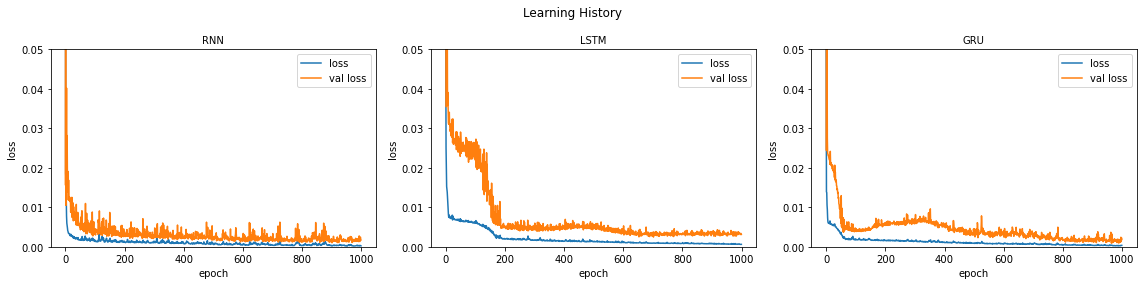

In [38]:
# Visualize Training History

# Set subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# Create a list of prediction models
models = [historyrnn, historylstm, historygru]

# Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# Plot learning history
plt.suptitle('Learning History')
for i in range(0, 3):
    plt.subplot(1, 3, i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(models[i].history['loss'], label='loss')
    plt.plot(models[i].history['val_loss'], label='val loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.ylim([0,0.05])

In [40]:
# Make predictions and reverse the predicted value to real number

# Predict by RNN model
rnn_y_pred=rnn.predict(X_test)
rnn_y_pred=scaler.inverse_transform(rnn_y_pred)

# Predict by LSTM model
lstm_y_pred=lstm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)

# Predict by GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

# Reverse test data to real number
y_test=y_test.reshape(y_test.shape[0],1)
y_test=scaler.inverse_transform(y_test)

2/2 [==============================] - 1s 3ms/step


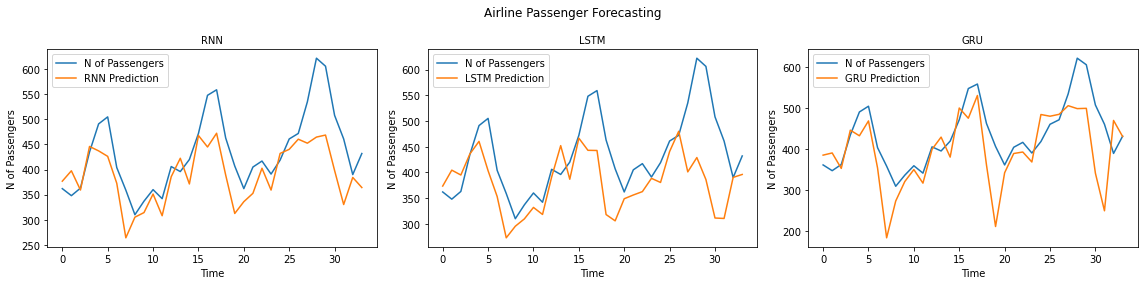

In [41]:
# Visualize Prediction Results

# Set subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# Create a list of prediction models
models = [rnn_y_pred, lstm_y_pred, gru_y_pred]

# Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)  

# Set the title
plt.suptitle('Airline Passenger Forecasting')

# Create and show subplots
for i in range(0, 3):
    plt.subplot(1, 3,i+1)
    plt.title(titles[i], fontsize=10) 
    plt.plot(y_test, label='N of Passengers')
    plt.plot(models[i], label=titles[i]+' Prediction')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('N of Passengers') 